# 验证数据集

In [12]:
import GenerateDataset
import os
import xml.dom.minidom
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw

In [2]:
PATH = "/home/yongchao/Dataset/ImageNet_Object_Detection/TestData";
FILENAME = PATH + '/ImageSets/DET/train_1.txt';
DATA_ROOT = PATH + '/Data/DET/train/';
ANNOTATION_ROOT = PATH + '/Annotations/DET/train/';

### 将BB显示到图片上面

In [45]:
def CombineImageAndXML(Image, XML):
    NameList, LocationList = XMLRead(XML);
    image = cv2.imread(Image);
    for (name,location) in zip(NameList, LocationList):             ## zip function
        #if name == "n02672831":
        #    cv2.rectangle(image, (location[0],location[2]), (location[1],location[3]), (0,255,0), 4)
        #else:
        #    cv2.rectangle(image, (location[0],location[2]), (location[1],location[3]), (255,255,0), 4)
        cv2.rectangle(image, (location[0],location[2]), (location[1],location[3]), (255,255,0), 4)
    return image

SyntaxError: invalid syntax (<ipython-input-45-b7c0b87df857>, line 4)

In [41]:
def ImageAndXMLPath(ImageSet):
    ImagePath = DATA_ROOT + ImageSet + '.JPEG';
    XMLPath = ANNOTATION_ROOT + ImageSet + '.xml';
    return ImagePath, XMLPath;

### 读取XML文件

In [46]:
def XMLRead(XML):
    NameList = [];
    LocationList = [];
    DOMTree = xml.dom.minidom.parse(XML);
    collection = DOMTree.documentElement;
    object = collection.getElementsByTagName("object");
    
    for i in range(len(object)):
        #print(i);
        name = object[i].getElementsByTagName("name");
        bndbox = object[i].getElementsByTagName("bndbox");
        xmin = int(bndbox[0].getElementsByTagName("xmin")[0].childNodes[0].nodeValue);
        xmax = int(bndbox[0].getElementsByTagName("xmax")[0].childNodes[0].nodeValue);
        ymin = int(bndbox[0].getElementsByTagName("ymin")[0].childNodes[0].nodeValue);
        ymax = int(bndbox[0].getElementsByTagName("ymax")[0].childNodes[0].nodeValue);
        Name = name[0].childNodes[0].nodeValue;
        location = [xmin, xmax, ymin, ymax];
        #print(Name);
        #print(location);
        NameList.append(Name);
        LocationList.append(location);
    return NameList, LocationList;

In [47]:
def run():
    ImageSet = GenerateDataset.ImageSetRead(FILENAME);
    
    for index,Image in enumerate(ImageSet):               ## enumerate function
        ImagePath, XMLPath = ImageAndXMLPath(Image);
        image = CombineImageAndXML(ImagePath, XMLPath);
        plt.figure(index);
        plt.imshow(image);
        #print(ImagePath, XMLPath);
        if(index == 3):
            break;
        

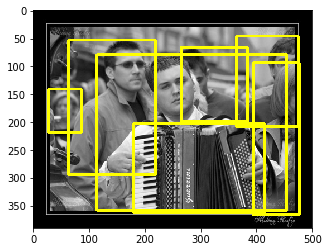

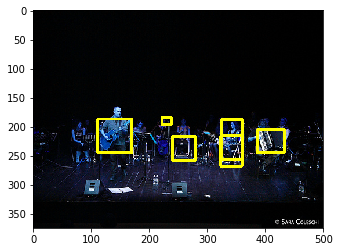

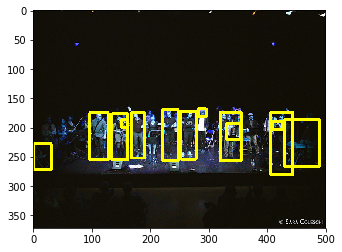

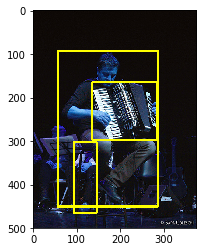

In [48]:
if __name__ == "__main__":
    run();